### Guided Project - Predict Crowdness at the Gym 
(Stochastic Gradient Descent on Linear Regression)

In this project we will be working with 'Crowdedness in the Gym' data set to analyse and use machine learning technique to understand the crowdness in the Gym. The aim of the project is to create a model that will predict the number of people at the gym given a day and time.

The column information is as below.
* number_people: this is the number of people at the gym at each observation. This will be our target variable or label.
* date: a string value with the specific date and time information.
* timestamp: an integer (int), with the number of seconds since the start of the day (00:00).
* dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
* is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
* is_holiday: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
* temperature: a float, defining the temperature during the day of the observation in Fahrenheit.
* isstartof_semester: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
* is_during_semester: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
* month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
* hour: an integer (int) for the hour of the day from 0 to 23.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [29]:
data = pd.read_csv('crowdness_gym_data.csv')

In [30]:
data.head(3)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17


#### Data Cleaning and Exploratory Data Analysis

In [31]:
#Display the rows and columns
data.shape

(62184, 11)

In [32]:
#check the null values in the data set
data.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


We will remove the date column since we can get that details from day_of_week, is_weekend columns.

In [34]:
data = data.drop(['date'], axis = 1)

In [35]:
#Select the numerical cols
numerical_cols = data.select_dtypes(include = np.number)

In [36]:
#check the correlation of the numeric cols
corr = numerical_cols.corr()
corr = round(corr,2)
corr

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.00,0.55,-0.16,-0.17,-0.05,0.37,0.18,0.34,-0.10,0.55
timestamp,0.55,1.00,-0.00,-0.00,0.00,0.18,0.01,0.04,-0.02,1.00
day_of_week,-0.16,-0.00,1.00,0.79,-0.08,0.01,-0.01,-0.00,0.02,-0.00
is_weekend,-0.17,-0.00,0.79,1.00,-0.03,0.02,-0.02,-0.04,0.01,-0.00
is_holiday,-0.05,0.00,-0.08,-0.03,1.00,-0.09,-0.01,-0.07,-0.09,0.00
temperature,0.37,0.18,0.01,0.02,-0.09,1.00,0.09,0.15,0.06,0.19
is_start_of_semester,0.18,0.01,-0.01,-0.02,-0.01,0.09,1.00,0.21,-0.14,0.01
is_during_semester,0.34,0.04,-0.00,-0.04,-0.07,0.15,0.21,1.00,0.10,0.05
month,-0.10,-0.02,0.02,0.01,-0.09,0.06,-0.14,0.10,1.00,-0.02
hour,0.55,1.00,-0.00,-0.00,0.00,0.19,0.01,0.05,-0.02,1.00


<AxesSubplot:>

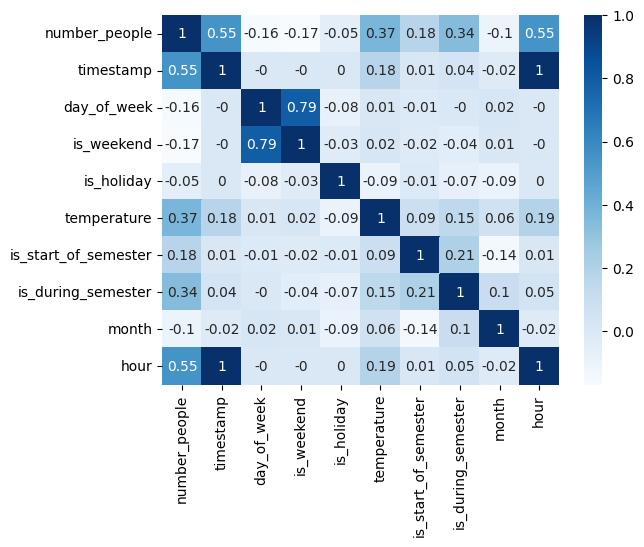

In [37]:
sns.heatmap(corr, annot = True, cmap = 'Blues')

From the above correlation map we can conclude th below.
* is_weekend is positively correlated with day_of_week.
* number_of_people has a positively correlation with hour, timestamp, is-during_semester, temperature.
* There is a negative correlation between hour with day_of_week, is_weekend, is_holiday, is_start_of_semester, is_during_semester, month.

#### Use graphs to determine the useful features

In [38]:
df_columns = data.columns
len(df_columns)

10

/tmp/ipykernel_64/991800975.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


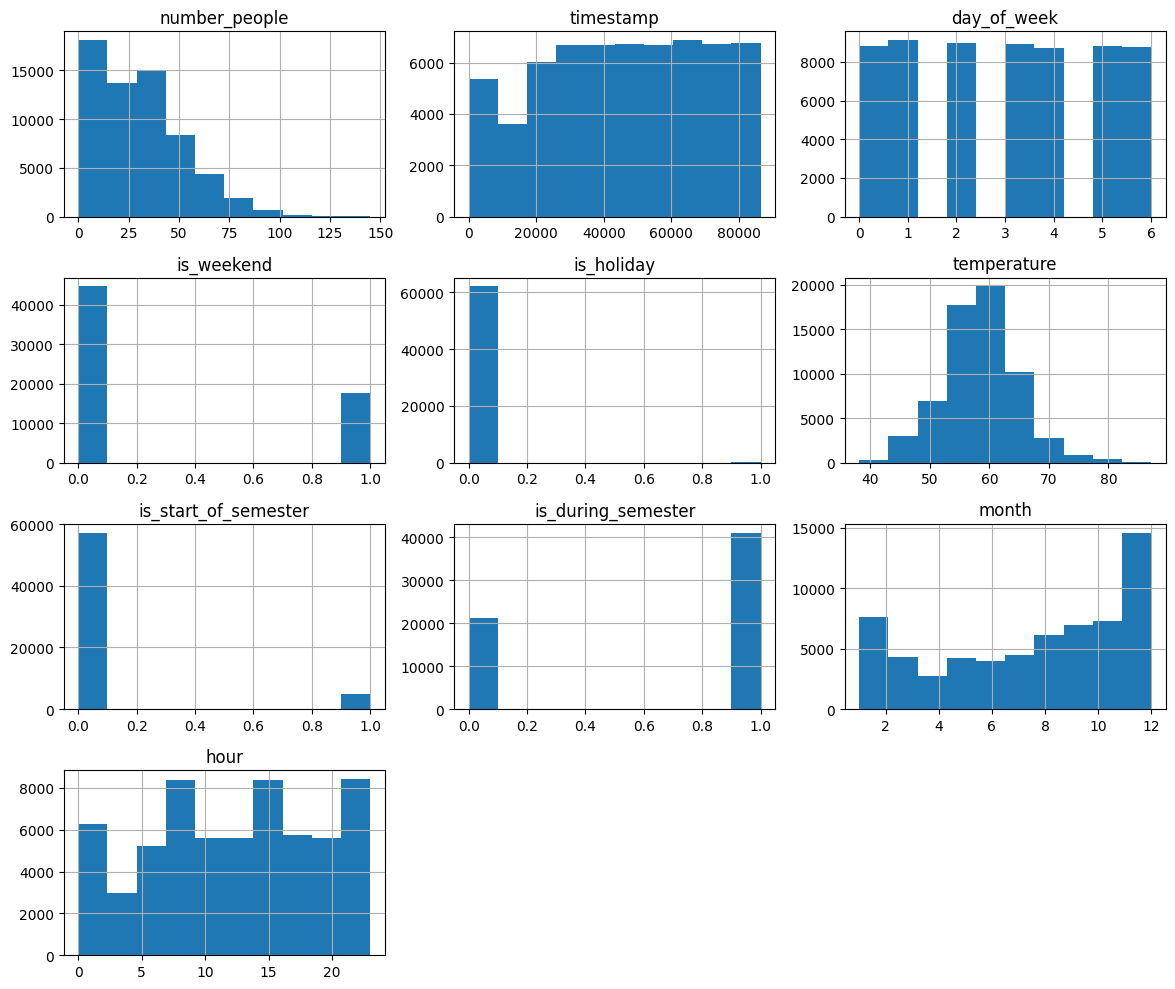

In [39]:
fig, ax = plt.subplots(figsize = (12,10))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

* From the above grpahs we can see some of the grpahs are skewed. In the is_holiday column it indicates high number of '0' and the holiday days count is hardly seen in the graph.
* We can also see that the timesamp column does not make much sense. we can get the same information from other columns such as hour, day_of_week.
* It is also difficult to understand insights from day_of_week column. We will use seabor to plot this column.

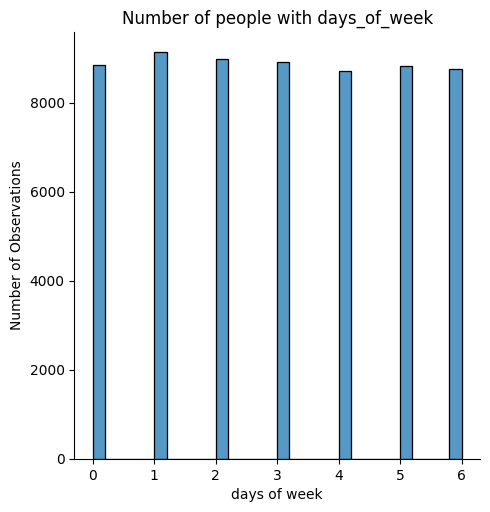

In [40]:
sns.displot(data['day_of_week'])
plt.title('Number of people with days_of_week')
plt.xlabel('days of week')
plt.ylabel('Number of Observations')
plt.show()

From the above results we can see that the highest observations are on Tuesday. There is not a very big variation of the observations in the days.

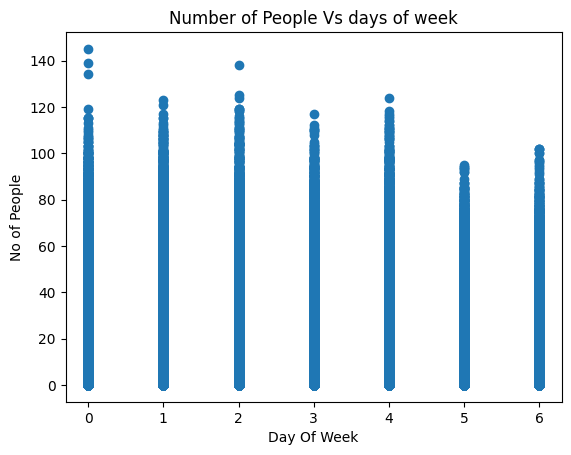

In [41]:
plt.scatter(data['day_of_week'], data['number_people'])
plt.title('Number of People Vs days of week')
plt.xlabel('Day Of Week')
plt.ylabel('No of People')
plt.show()

from the above graph we can see that Monday to Wednesday is the highest number of people in the gym. weekend its less people in the gym.

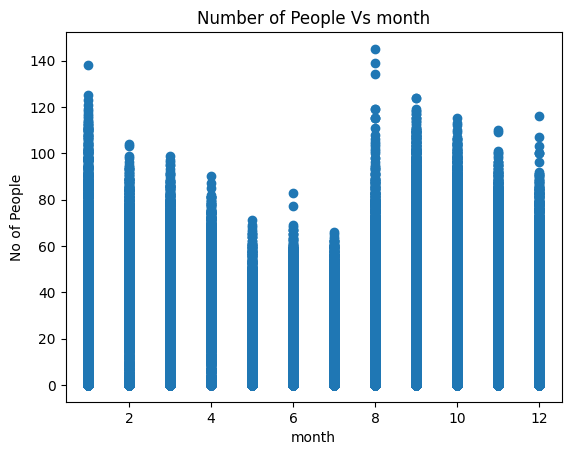

In [42]:
plt.scatter(data['month'], data['number_people'])
plt.title('Number of People Vs month')
plt.xlabel('month')
plt.ylabel('No of People')
plt.show()

From the above grpah we can see that there is high number of people in the gym beginning of the year and there is a decrese until July. From August onwards the crowd will be relatively high. August will have the highest number of people in the gym.

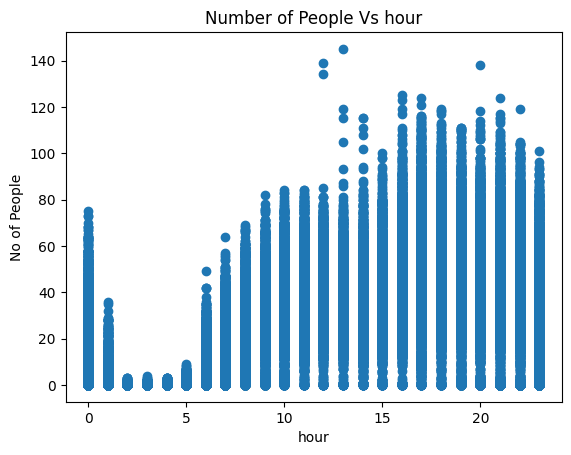

In [43]:
plt.scatter(data['hour'], data['number_people'])
plt.title('Number of People Vs hour')
plt.xlabel('hour')
plt.ylabel('No of People')
plt.show()

There is high number of people from afternoon untill midnight in the gym. There relatively lower crowds early in the morning from 2AM o about 5AM

#### Feature Selection

In [44]:
#chek the value_counts for is_holiday column
data['is_holiday'].value_counts()

0    62024
1      160
Name: is_holiday, dtype: int64

we can remove the timestamp column as the column data does not make any sense. Instead we can use the hour column to get the information on the crowd on specific time of the day.

#### Build the Machine Learning Model

In [45]:
sgdr = SGDRegressor(alpha=0.0001, random_state = 52)

In [46]:
X = data.drop(['is_holiday', 'number_people'], axis = 1)
y = data['number_people']

#Split the data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 217)

In [47]:
sgdr.fit(X_train, y_train)

SGDRegressor(random_state=52)

#### Evaluate the Model

In [48]:
y_pred = sgdr.predict(X_test)

In [49]:
#calculate the mean_squared_error, root_mean_squred_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2_sc = r2_score(y_test, y_pred)
mean_ae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error of the model is:',mse)
print('Root Mean Squared Error of the model is:',rmse)
print('R2 Socre of the model is:',r2_sc)
print('Mean Absolute Error of the model is:',mean_ae)

Mean Squared Error of the model is: 1.7656005342795346e+35
Root Mean Squared Error of the model is: 4.2019049659404896e+17
R2 Socre of the model is: -3.514785866167218e+32
Mean Absolute Error of the model is: 3.716443247147158e+17


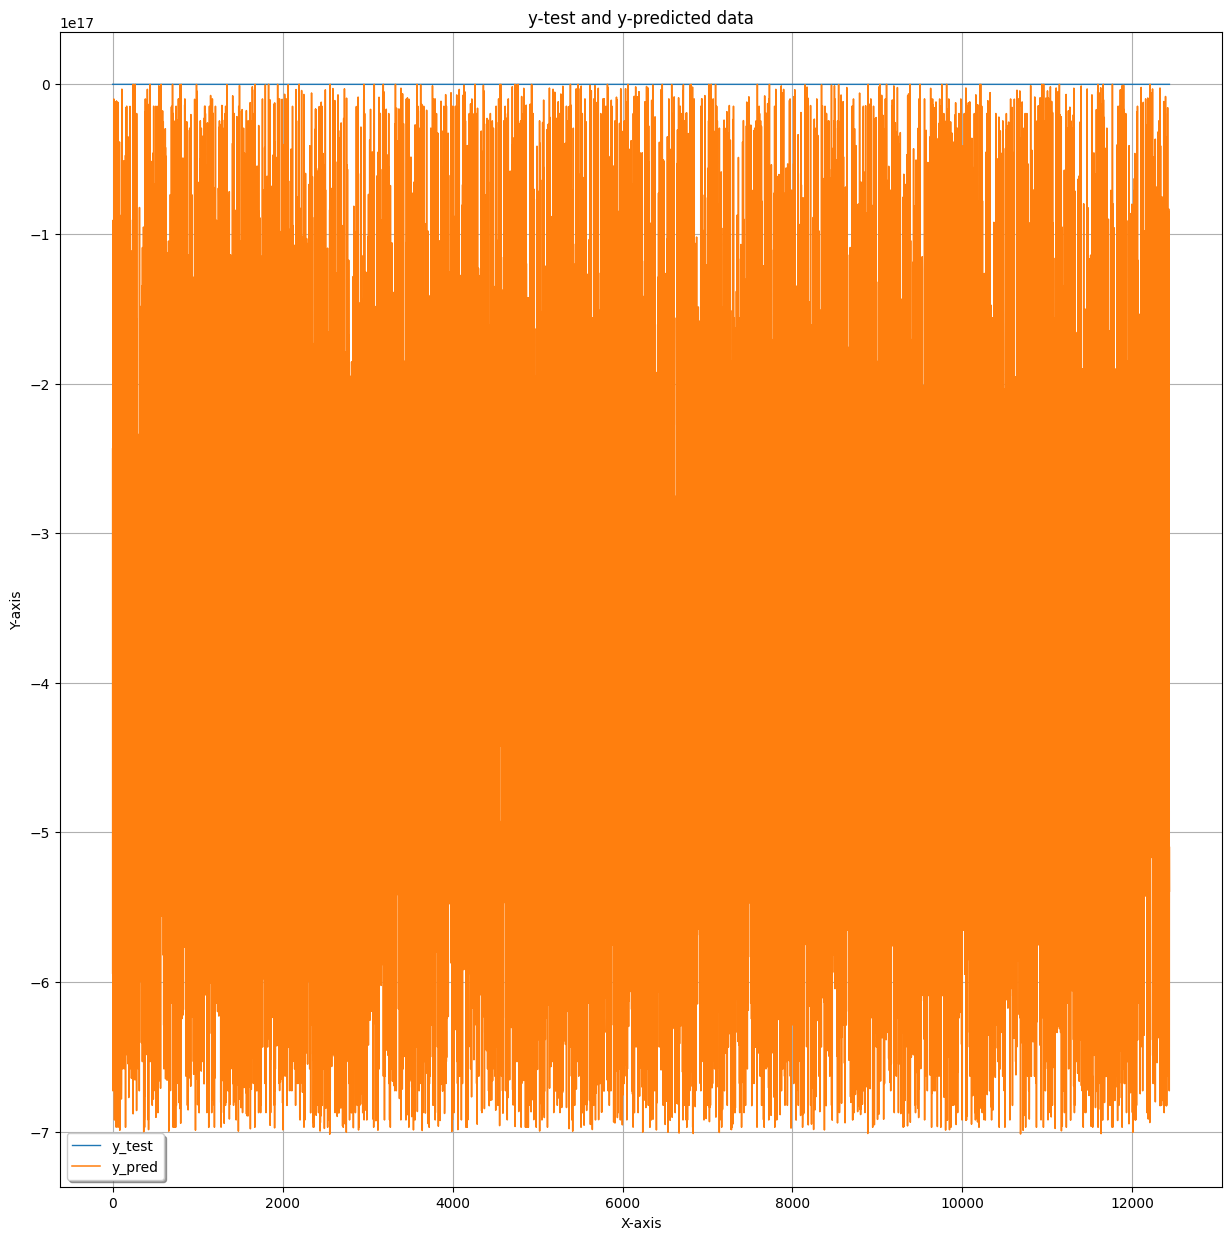

In [50]:
plt.figure(figsize = (15,15))
x_ax = range(len(y_test))
plt.plot(x_ax,y_test, label = 'y_test', linewidth = 1)
plt.plot(x_ax,y_pred, label = 'y_pred', linewidth = 1.1)
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

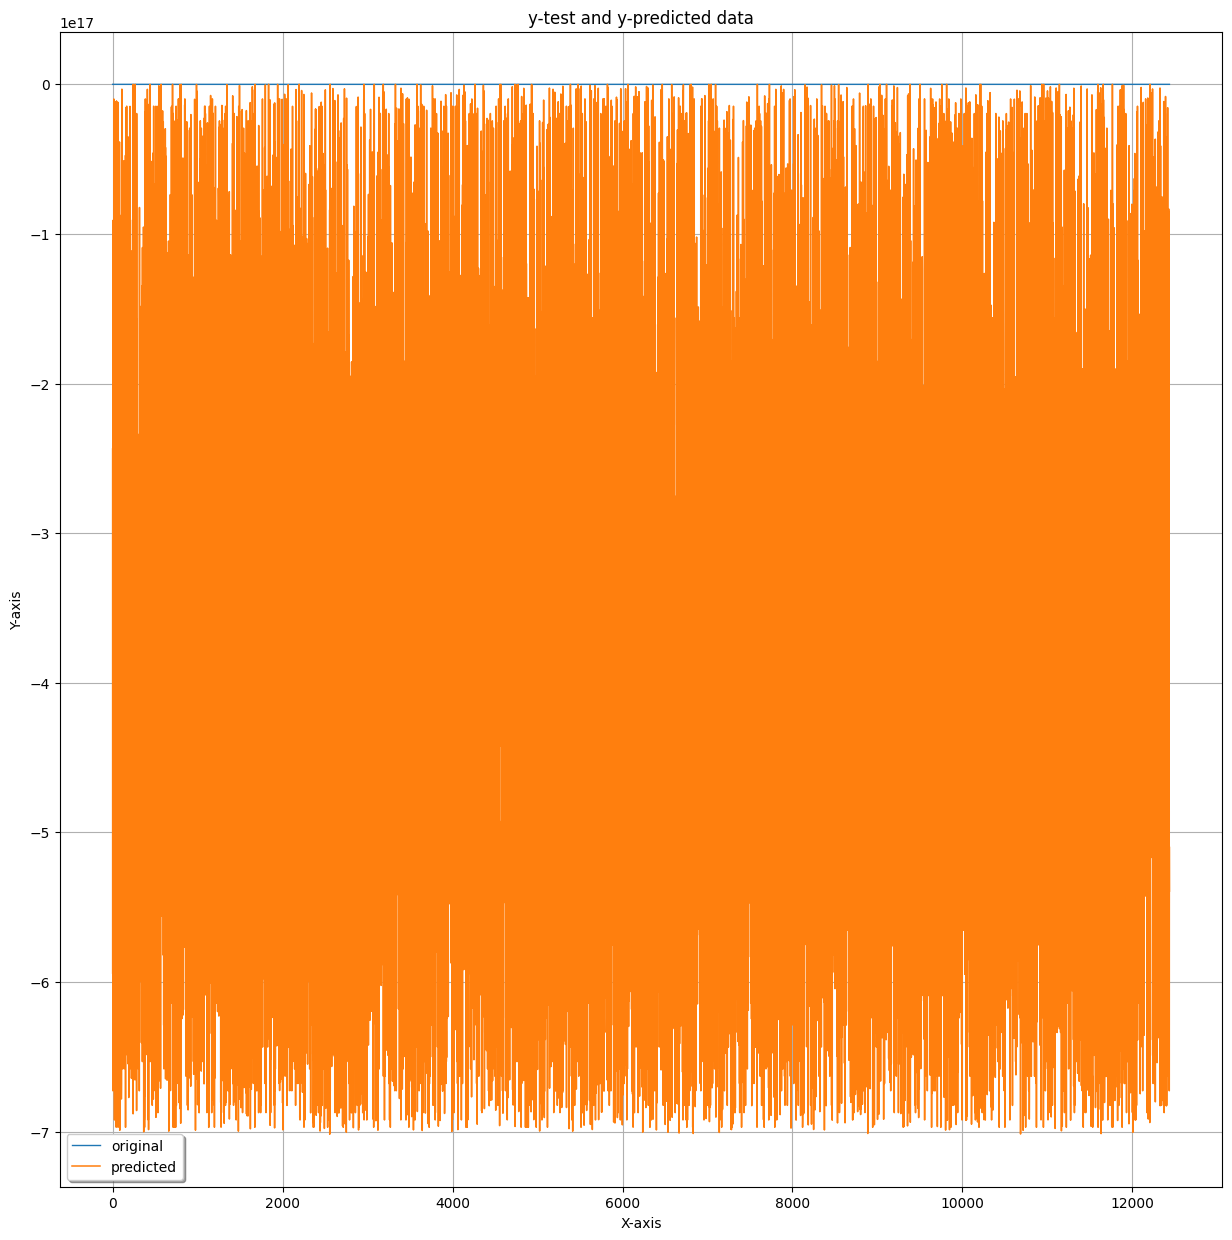

In [51]:
plt.figure(figsize=(15, 15))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### Conclusion

From the above model we got a mean squared error of 1.7 that is relatively good. From the analysis we can see that during the day early morning is the time that the gym is less crowded.